In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_Transient_NS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H2.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.18 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Path to the directory containing CSV files
csv_directory = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Circumferential Crack'
# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df['Value'])

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df["LeakType"] = "Circumferential Crack"

# Rename columns
df = df.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [4]:
# Path to the directory containing CSV files
csv_directory1 = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Gasket Leak'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory1) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory1, file)
    df1 = pd.read_csv(file_path)
    dataframes.append(df1['Value'])

# Concatenate all DataFrames into a single DataFrame
df1 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df1["LeakType"] = "Gasket Leak"

# Rename columns
df1 = df1.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [5]:

# Path to the directory containing CSV files
csv_directory2 = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Longitudinal Crack'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory2) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory2, file)
    df2 = pd.read_csv(file_path)
    dataframes.append(df2['Value'])

# Concatenate all DataFrames into a single DataFrame
df2 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df2["LeakType"] = "Longitudinal Crack"

# Rename columns
df2 = df2.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [6]:
# Path to the directory containing CSV files
csv_directory3 = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/NonLeak"

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory3) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory3, file)
    df3 = pd.read_csv(file_path)
    dataframes.append(df3['Value'])

# Concatenate all DataFrames into a single DataFrame
df3 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df3["LeakType"] = "NonLeak"

# Rename columns
df3 = df3.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [7]:
# Path to the directory containing CSV files
csv_directory4 = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Orifice Leak"

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory4) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory4, file)
    df4 = pd.read_csv(file_path)
    dataframes.append(df4['Value'])

# Concatenate all DataFrames into a single DataFrame
df4 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df4["LeakType"] = "Orifice Leak"

# Rename columns
df4 = df4.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [8]:
data = pd.concat([df, df1, df2, df3, df4], axis=0)
data.head()

Value1      Value2       Value3     Value4      Value5       Value6  \
0  2996.926727 -113.172939 -5831.317138 -16.616780 -271.350365  -217.853912   
1  3032.398590 -110.099963 -5639.000792 -22.439262 -265.770487  -472.613815   
2  3028.638899 -110.180830 -5441.535304 -33.518152 -268.924331  -696.642334   
3  3011.311630 -109.857359 -5234.670590 -21.145378 -271.269497  -899.910822   
4  2944.863185 -108.725210 -5015.464283 -25.997446 -265.042677 -1085.852041   

        Value7      Value8               LeakType  
0  3450.459835 -212.802075  Circumferential Crack  
1  3634.194279 -206.656122  Circumferential Crack  
2  3821.688413 -205.281369  Circumferential Crack  
3  4004.278604 -210.537776  Circumferential Crack  
4  4148.863226 -206.817857  Circumferential Crack

In [9]:
data.sample(5)

Value1       Value2       Value3      Value4       Value5  \
410414 -4929.645259  4310.693385  -458.555841 -187.733055   249.761768   
915205   -11.602977          NaN  4542.077821  761.790680 -2958.586609   
194649 -2302.111942  3935.132990   222.185847 -215.470712    72.823012   
807547     5.136659 -2466.884468   211.430429  123.446257 -3401.903167   
964938          NaN          NaN          NaN   38.049855          NaN   

             Value6       Value7       Value8            LeakType  
410414 -4426.909244  -126.192656   -24.703561  Longitudinal Crack  
915205   148.353541  7426.741281    85.276653         Gasket Leak  
194649    35.623821 -2491.485921 -5239.247605             NonLeak  
807547   102.986703 -2659.037349  3414.824507        Orifice Leak  
964938          NaN          NaN -3737.251220             NonLeak

In [10]:
data= data.sample(frac=1,random_state=55)
data

Value1       Value2       Value3       Value4       Value5  \
636135  -857.318478  -184.336607  1321.412449  2708.574806  -213.930757   
825733  4779.510454     4.866888   100.398933   170.834791   -10.309092   
163421  1829.052409   263.671031  -113.726830  -297.470666   282.351493   
278487   196.712488  5150.493835  -219.999309    11.282612  6926.457237   
786279  3003.955713  4023.158789   151.911724   -69.746928   -42.494478   
...             ...          ...          ...          ...          ...   
65000  -4490.006659  2835.423497   -25.027032   277.742029    57.215525   
532401   216.444233  3793.245537   148.272673  1169.471311    22.684552   
437954   184.582318   264.075370 -2018.909163 -2277.428756  5377.955114   
129741   -24.946164    96.759882 -3987.597573  4845.795433   430.529247   
26867   -191.857313  6977.376524   243.454079   -10.794299  3438.281707   

             Value6       Value7       Value8               LeakType  
636135   -85.920489  3825.448104   -10.875166            Gasket Leak  
825733   -60.366263  1244.093595   586.556406                NonLeak  
163421  2952.464299  4289.524693    10.716538  Circumferential Crack  
278487  -121.017116 -4224.866741 -4690.659711           Orifice Leak  
786279  -106.137440   -48.504372  4537.746003                NonLeak  
...             ...          ...          ...                    ...  
65000    -68.291308  -771.754413    83.983855                NonLeak  
532401   -90.368218 -1173.387445  3352.953078           Orifice Leak  
437954    -9.743017  1804.614420  -196.790249            Gasket Leak  
129741   -13.058597  4367.987801   441.903672            Gasket Leak  
26867    147.463995 -3089.440188  3375.919883           Orifice Leak  

[5048643 rows x 9 columns]

In [11]:
data['LeakType'].unique()

array(['Gasket Leak', 'NonLeak', 'Circumferential Crack', 'Orifice Leak',
       'Longitudinal Crack'], dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5048643 entries, 636135 to 26867
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Value1    float64
 1   Value2    float64
 2   Value3    float64
 3   Value4    float64
 4   Value5    float64
 5   Value6    float64
 6   Value7    float64
 7   Value8    float64
 8   LeakType  object 
dtypes: float64(8), object(1)
memory usage: 385.2+ MB


In [13]:
data.describe()

Value1        Value2        Value3        Value4        Value5  \
count  4.702150e+06  4.744602e+06  4.695467e+06  4.780665e+06  4.737088e+06   
mean   8.739976e+00  5.781382e+00  8.716257e-01  1.346746e+01  1.352033e+01   
std    2.595875e+03  2.682198e+03  2.896144e+03  1.993122e+03  2.509983e+03   
min   -1.614570e+04 -1.765146e+04 -1.801582e+04 -1.706723e+04 -1.669723e+04   
25%   -7.927596e+02 -8.053464e+02 -6.940678e+02 -1.839350e+02 -2.013997e+02   
50%   -2.504717e+01 -2.640178e+01  8.128768e+00 -7.478719e+00 -3.030989e+00   
75%    6.905200e+02  7.673485e+02  7.197802e+02  1.549038e+02  2.189511e+02   
max    1.843185e+04  1.575503e+04  2.269362e+04  1.587681e+04  1.709756e+04   

             Value6        Value7        Value8  
count  4.650655e+06  4.850358e+06  4.695740e+06  
mean   2.959732e+01  7.138650e+00 -4.610880e+01  
std    2.884664e+03  3.491494e+03  2.425758e+03  
min   -1.733098e+04 -1.984287e+04 -1.743397e+04  
25%   -2.492735e+02 -1.849641e+03 -2.132064e+02  
50%   -1.944715e+01 -3.623517e-01  3.681039e+00  
75%    2.242884e+02  1.824148e+03  1.956612e+02  
max    1.935951e+04  2.123633e+04  1.973074e+04

In [14]:
data.isna()
data = data.dropna()
print(data.describe())

             Value1        Value2        Value3        Value4        Value5  \
count  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06   
mean   8.947192e+00  5.114738e+00  4.731267e-01  1.269331e+01  1.382012e+01   
std    2.615794e+03  2.666993e+03  2.922059e+03  2.022469e+03  2.474701e+03   
min   -1.614570e+04 -1.765146e+04 -1.801582e+04 -1.706723e+04 -1.669723e+04   
25%   -8.435155e+02 -7.689755e+02 -7.533646e+02 -1.895930e+02 -1.889461e+02   
50%   -2.583571e+01 -2.793827e+01  8.937446e+00 -7.478719e+00 -2.626650e+00   
75%    7.496943e+02  7.223957e+02  7.783006e+02  1.538526e+02  2.086001e+02   
max    1.843185e+04  1.575503e+04  2.269362e+04  1.587681e+04  1.709756e+04   

             Value6        Value7        Value8  
count  4.576576e+06  4.576576e+06  4.576576e+06  
mean   3.322980e+01  6.159641e+00 -4.690819e+01  
std    2.887592e+03  3.480486e+03  2.426585e+03  
min   -1.733098e+04 -1.984287e+04 -1.743397e+04  
25%   -2.504056e+02 -1.828391e+03 -2.0

In [15]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
data.drop_duplicates(inplace=True)


In [17]:
data.describe()

Value1        Value2        Value3        Value4        Value5  \
count  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06   
mean   8.947192e+00  5.114738e+00  4.731267e-01  1.269331e+01  1.382012e+01   
std    2.615794e+03  2.666993e+03  2.922059e+03  2.022469e+03  2.474701e+03   
min   -1.614570e+04 -1.765146e+04 -1.801582e+04 -1.706723e+04 -1.669723e+04   
25%   -8.435155e+02 -7.689755e+02 -7.533646e+02 -1.895930e+02 -1.889461e+02   
50%   -2.583571e+01 -2.793827e+01  8.937446e+00 -7.478719e+00 -2.626650e+00   
75%    7.496943e+02  7.223957e+02  7.783006e+02  1.538526e+02  2.086001e+02   
max    1.843185e+04  1.575503e+04  2.269362e+04  1.587681e+04  1.709756e+04   

             Value6        Value7        Value8  
count  4.576576e+06  4.576576e+06  4.576576e+06  
mean   3.322980e+01  6.159641e+00 -4.690819e+01  
std    2.887592e+03  3.480486e+03  2.426585e+03  
min   -1.733098e+04 -1.984287e+04 -1.743397e+04  
25%   -2.504056e+02 -1.828391e+03 -2.064944e+02  
50%   -1.904281e+01  1.497608e+00  3.761906e+00  
75%    2.259866e+02  1.790148e+03  1.926691e+02  
max    1.935951e+04  2.123633e+04  1.973074e+04

In [18]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data.select_dtypes(include=['float64']).apply(zscore)

# Define a threshold for identifying outliers (adjust as needed)
threshold = 3

# Identify and remove outliers
data_no_outliers = data[(z_scores.abs() < threshold).all(axis=1)]

# Compare shapes to see how many outliers were removed
print("Original shape:", data.shape)
print("Data without outliers shape:", data_no_outliers.shape)

# Check for missing values after removing outliers
missing_values_after = data_no_outliers.isna().sum()
print("Missing values after removing outliers:")
print(missing_values_after)

Original shape: (4576576, 9)
Data without outliers shape: (3925643, 9)
Missing values after removing outliers:
Value1      0
Value2      0
Value3      0
Value4      0
Value5      0
Value6      0
Value7      0
Value8      0
LeakType    0
dtype: int64


In [19]:
label_encoder = LabelEncoder()
data['category_label_encoded'] = label_encoder.fit_transform(data['LeakType'])

In [20]:
# Decode the encoded labels back to original values
decoded_labels = label_encoder.inverse_transform(data['category_label_encoded'])
decoded_labels

array(['Gasket Leak', 'NonLeak', 'Circumferential Crack', ...,
       'Gasket Leak', 'Gasket Leak', 'Orifice Leak'], dtype=object)

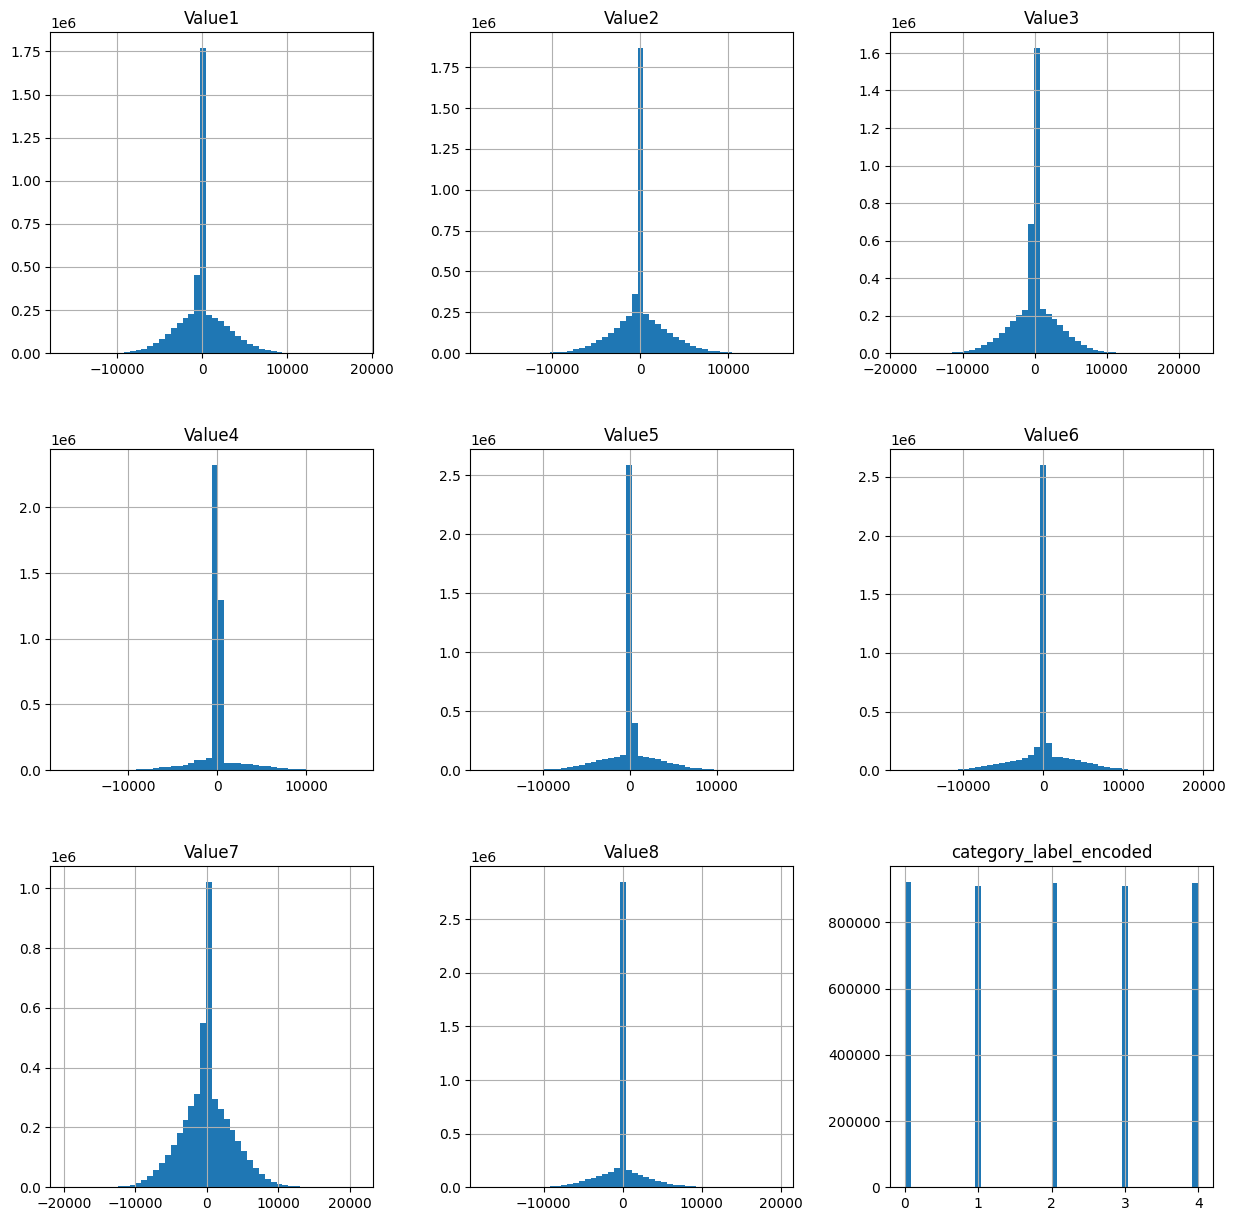

In [21]:
data.hist(bins=50, figsize=(15,15))
plt.show()

In [22]:
# Calculate summary statistics
summary_stats = data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
# Calculate skewness and kurtosis for numeric columns only
skewness = data.select_dtypes(include='number').skew()
kurtosis = data.select_dtypes(include='number').kurtosis()

# Calculate the correlation matrix for numeric columns only
correlation_matrix = data.select_dtypes(include='number').corr()

# Count missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

# Print or analyze the calculated statistics as needed
print(summary_stats)
print(skewness)
print(kurtosis)
print(correlation_matrix)
print(missing_values)
print(missing_percent)

             Value1        Value2        Value3        Value4        Value5  \
count  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06  4.576576e+06   
mean   8.947192e+00  5.114738e+00  4.731267e-01  1.269331e+01  1.382012e+01   
std    2.615794e+03  2.666993e+03  2.922059e+03  2.022469e+03  2.474701e+03   
min   -1.614570e+04 -1.765146e+04 -1.801582e+04 -1.706723e+04 -1.669723e+04   
10%   -3.186783e+03 -3.172807e+03 -3.558911e+03 -8.910837e+02 -2.609262e+03   
25%   -8.435155e+02 -7.689755e+02 -7.533646e+02 -1.895930e+02 -1.889461e+02   
50%   -2.583571e+01 -2.793827e+01  8.937446e+00 -7.478719e+00 -2.626650e+00   
75%    7.496943e+02  7.223957e+02  7.783006e+02  1.538526e+02  2.086001e+02   
90%    3.294596e+03  3.284134e+03  3.561534e+03  5.972634e+02  2.692637e+03   
max    1.843185e+04  1.575503e+04  2.269362e+04  1.587681e+04  1.709756e+04   

             Value6        Value7        Value8  category_label_encoded  
count  4.576576e+06  4.576576e+06  4.576576e+06         

<Figure size 1200x800 with 0 Axes>

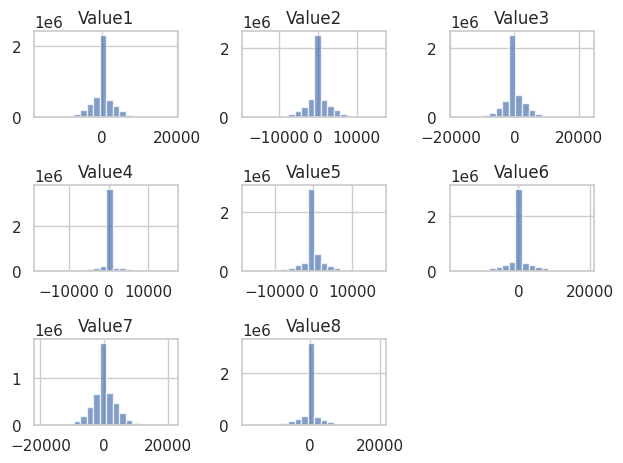

In [23]:
# Set style for Seaborn plots
sns.set(style="whitegrid")

# Histograms
numerical_columns = ['Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Value6', 'Value7', 'Value8']
plt.figure(figsize=(12, 8))
data[numerical_columns].hist(bins=20, alpha=0.7)
plt.tight_layout()
plt.show()

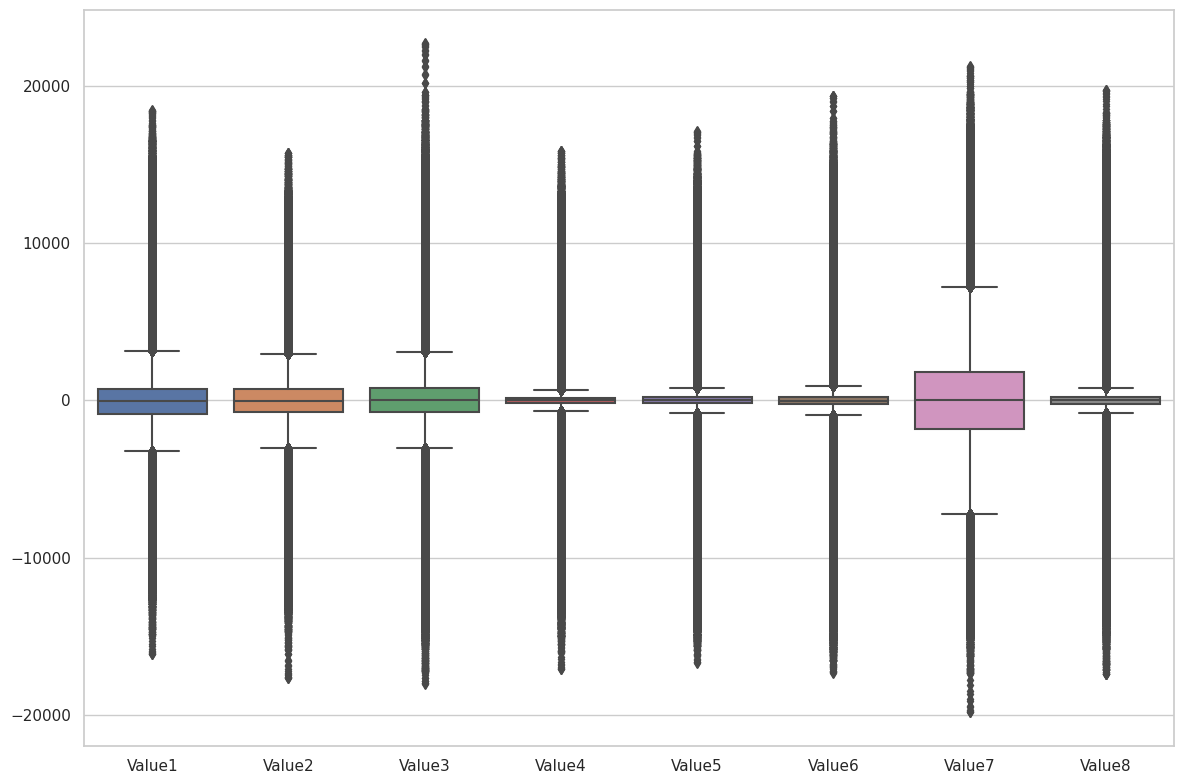

In [24]:
# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns])
plt.tight_layout()
plt.show()

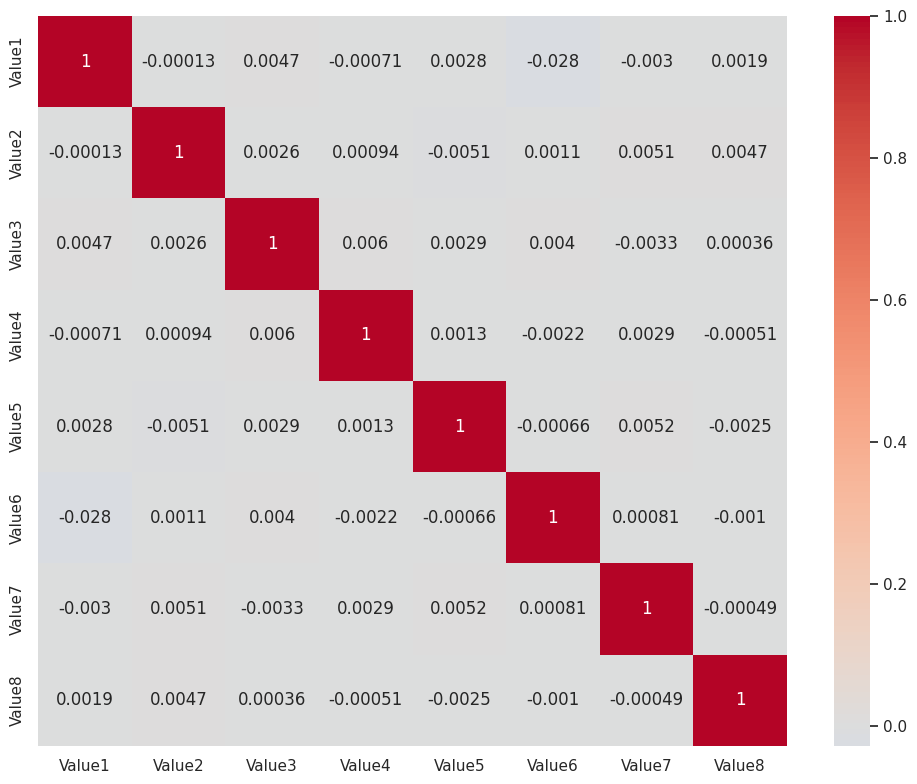

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

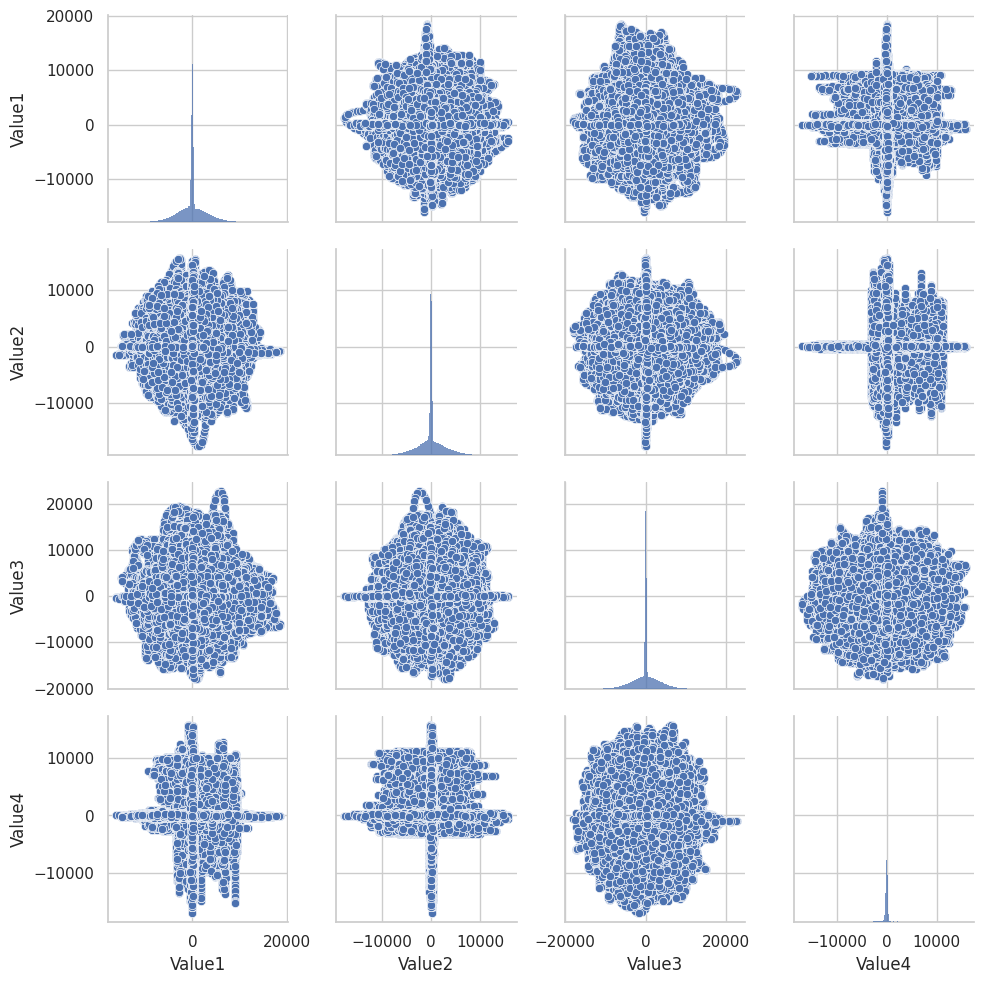

In [26]:
# Pair Plots (select a subset if there are too many variables)
sns.pairplot(data[numerical_columns[:4]])
plt.tight_layout()
plt.show()

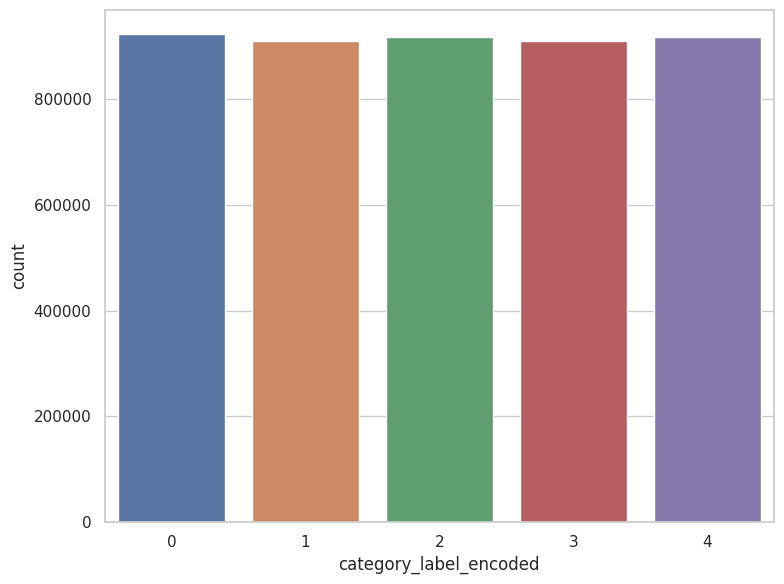

In [27]:
# Bar Plots (for categorical variables)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='category_label_encoded')
plt.tight_layout()
plt.show()

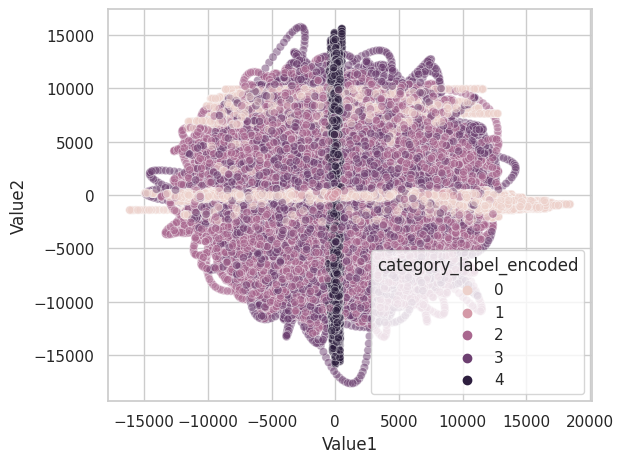

In [28]:
# Scatter Plots (for pairs of numerical variables)
sns.scatterplot(data=data, x='Value1', y='Value2', hue='category_label_encoded', alpha=0.5)
plt.tight_layout()
plt.show()

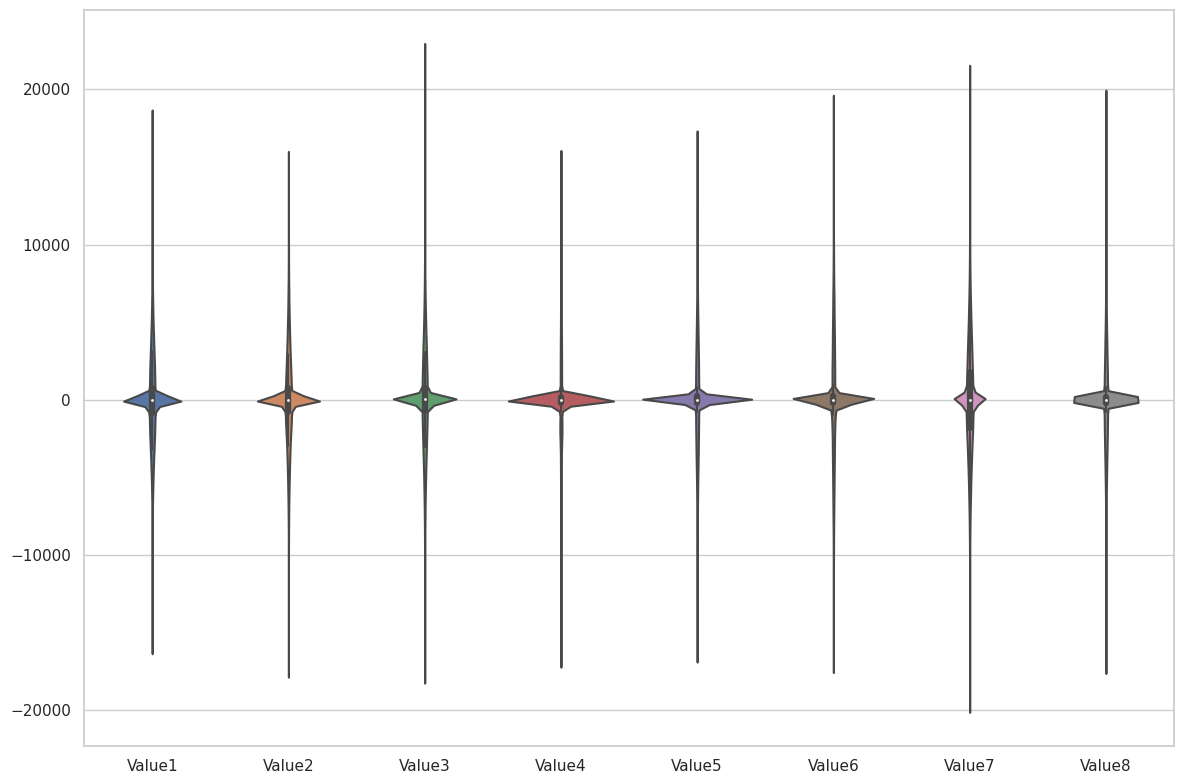

In [29]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=data[numerical_columns])
plt.tight_layout()
plt.show()

# Time Series Plot (if applicable, assuming a time column named 'Time')
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=data, x='Time', y='Value1')
# plt.tight_layout()
# plt.show()


In [30]:
# Assuming you have already preprocessed your data and split it into X and y
X = data.drop(['LeakType', 'category_label_encoded'], axis=1)  # Features
y = data['category_label_encoded']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Standardize features (Z-score scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Build DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Output layer, 5 for the number of unique categories

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train, epochs=3, batch_size=16, validation_data=(X_test_scaled, y_test))

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test_scaled)

# Optionally, you can convert the predicted probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

Epoch 1/3
228829/228829 [==============================] - 689s 3ms/step - loss: 0.0601 - accuracy: 0.9759 - val_loss: 0.0500 - val_accuracy: 0.9793
Epoch 2/3
228829/228829 [==============================] - 678s 3ms/step - loss: 0.0492 - accuracy: 0.9798 - val_loss: 0.0470 - val_accuracy: 0.9807
Epoch 3/3
28604/28604 [==============================] - 57s 2ms/step - loss: 0.0498 - accuracy: 0.9794
Test Loss: 0.0498
Test Accuracy: 0.9794
28604/28604 [==============================] - 36s 1ms/step


In [33]:
# Save the trained model to an .h5 file
model.save('pressure-branched_model.h5')

print("Deep Learning model saved to pressure-branched_model.h5")

Deep Learning model saved to pressure-branched_model.h5


In [34]:
import tensorflow as tf

# Load the model
#model = tf.keras.models.load_model('/kaggle/input/branched-model/pressure-branched_model.h5')

In [35]:
import numpy as np
arr1 = [[5,9,4,10,20,5,7,4]]
model.predict(arr1)

1/1 [==============================] - 0s 89ms/step


array([[0., 1., 0., 0., 0.]], dtype=float32)

In [36]:
arr1 = [[50,90,4,10,20,5,7,4]]
model.predict(arr1)

1/1 [==============================] - 0s 37ms/step


array([[0., 0., 1., 0., 0.]], dtype=float32)

In [37]:
arr1 = [[5,9,4,10,20,5,7,14]]
model.predict(arr1)

1/1 [==============================] - 0s 38ms/step


array([[0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        7.940926e-21]], dtype=float32)

In [38]:
arr1 = [[5,9,4,10,20,4,7,4]]
model.predict(arr1)

1/1 [==============================] - 0s 39ms/step


array([[0., 1., 0., 0., 0.]], dtype=float32)

In [39]:
arr1 = [[5,9,4,10,20,5,4,7]]
model.predict(arr1)

1/1 [==============================] - 0s 38ms/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        7.1842913e-38]], dtype=float32)

In [40]:
arr1 = [[555,444,5555,777,1052,556,74,44]]
model.predict(arr1) # ['Gasket Leak', 'NonLeak', 'Circumferential Crack', 'Orifice Leak','Longitudinal Crack']

1/1 [==============================] - 0s 38ms/step


array([[0., 1., 0., 0., 0.]], dtype=float32)

In [41]:
arr1 = [[0,1,2,3,4,5,6,7]]
model.predict(arr1)

1/1 [==============================] - 0s 39ms/step


array([[0.0000000e+00, 1.1311275e-02, 0.0000000e+00, 3.7590916e-36,
        9.8868877e-01]], dtype=float32)